In [367]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [368]:
df = pd.read_csv("csv_files\cricket_flour_study_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\VOrozco\AppData\Local\Temp\ipykernel_18596\645131163.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("csv_files\cricket_flour_study_dataset.csv")


In [369]:
df.describe()

,health_rank,price_rank,sustainability_rank,taste_rank,openness,willingness
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.675000,2.620000,2.680000,2.025000,3.185000,3.260000
std,1.120559,1.068319,1.087896,1.067743,1.224037,0.988578
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000
50%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000


In [370]:
df.head()

,age,health_rank,price_rank,sustainability_rank,taste_rank,dietary_habits,openness,tried,willingness
0,25-34,3,2,1,4,Omnivore,3,Yes,4
1,18-24,1,3,4,2,Vegetarian,2,No,3
2,18-24,3,2,4,1,Omnivore,4,No,2
3,35-44,4,3,2,1,Omnivore,3,Yes,4
4,18-24,3,1,2,4,Omnivore,1,No,2


In [371]:
df = df.rename(columns= {"health_rank":"health", "price_rank":"price", "sustainability_rank":"sustainability","taste_rank":"taste"})

In [372]:
df["willingness_try_cricket"] = df["willingness"].map({
    1: "low", 2: "low",
    3:"medium",
    4:"high", 5:"high"
})

In [373]:
df.head(5)

,age,health,price,sustainability,taste,dietary_habits,openness,tried,willingness,willingness_try_cricket
0,25-34,3,2,1,4,Omnivore,3,Yes,4,high
1,18-24,1,3,4,2,Vegetarian,2,No,3,medium
2,18-24,3,2,4,1,Omnivore,4,No,2,low
3,35-44,4,3,2,1,Omnivore,3,Yes,4,high
4,18-24,3,1,2,4,Omnivore,1,No,2,low


In [374]:
# because the rankings are from 1 being more important to 5 being less important we are changing the order so higher values reflect high importance across the bd
df["health"] = 5-df["health"]
df["price"] = 5-df["price"]
df["sustainability"] = 5-df["sustainability"]
df["taste"] = 5- df["taste"]

    

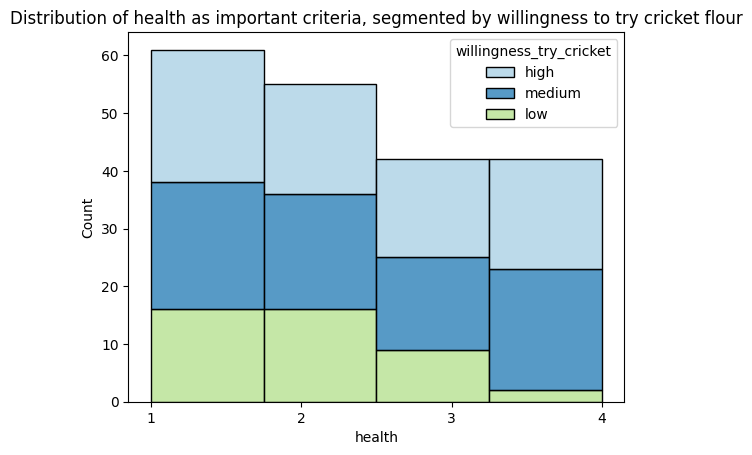

In [375]:
sns.histplot(data = df, x="health", bins=4, hue= "willingness_try_cricket", multiple="stack", palette="Paired")
plt.xticks([1, 2, 3, 4])  # Force only these values on x-axis
#plt.legend(title= "Willingness to try")
plt.title("Distribution of health as important criteria, segmented by willingness to try cricket flour")
plt.show()

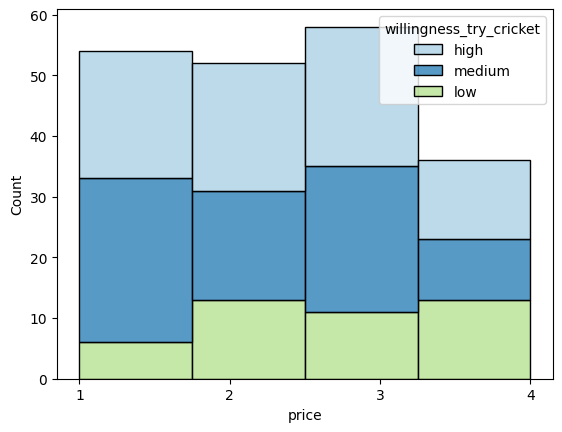

In [376]:
sns.histplot(data= df, x= "price",bins=4, hue= "willingness_try_cricket", multiple="stack", palette="Paired")
plt.xticks([1, 2, 3, 4])  # Force only these values on x-axis
plt.show()

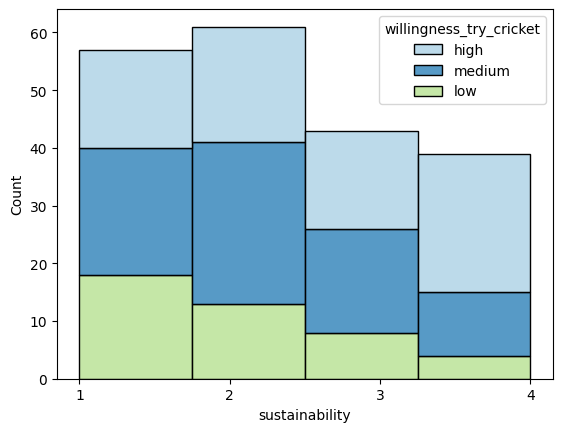

In [377]:
sns.histplot(data= df, x="sustainability", bins=4, hue= "willingness_try_cricket", multiple="stack", palette="Paired")
plt.xticks([1, 2, 3, 4])  # Force only these values on x-axis
plt.show()

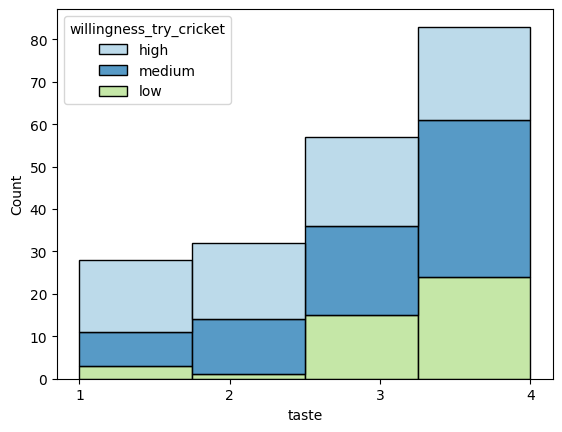

In [378]:
sns.histplot(data= df, x= "taste", bins=4, hue= "willingness_try_cricket", multiple="stack", palette="Paired")
plt.xticks([1, 2, 3, 4])  # Force only these values on x-axis
plt.show()

#To veryfy which group is most correlated to willingness to try cricket flour:
1. probability calculations (p(buying|high nutrition importance or p buying|high sustainability importance)

In [379]:
# def for probability calculations
def grouping(column, operator, threshold):
    if operator == ">":
        high_variable_high_likelihood = df[(df[column] > threshold) & (df["willingness"] > 3)]
    elif operator == "==":
        high_variable_high_likelihood = df[(df[column] == threshold) & (df["willingness"] > 3)]
    return high_variable_high_likelihood


high_sust_high_likeli = grouping("sustainability", ">",3)
high_health_high_likeli = grouping("health",">",3)
high_taste_high_likeli = grouping("taste",">",3)
high_price_high_likeli = grouping("price",">",3)


In [380]:
print(len(high_sust_high_likeli))

24


In [381]:
criteria_groups = {
"sustainability": high_sust_high_likeli,
"health" : high_health_high_likeli,
"taste" : high_taste_high_likeli, 
"price": high_price_high_likeli 
}

def probabilities(evaluators, column=None):
    p_buy = {}
    for criteria, high_likeli in evaluators.items():
        if column == "dietary_habits":
            # Use diet as filtering
            total = len(df[df[column] == criteria])
        elif column == "age":
            # Use age as filtering
            total = len(df[df[column] == criteria])
        else:
            # Default: use specific column
            print(criteria)
            total = len(df[(df[criteria] > 3)])
            print(total)
        
        p_buy[criteria] = len(high_likeli) / total if total > 0 else None
    
    return p_buy

In [382]:
probability_by_criteria = probabilities(criteria_groups)

sustainability
39
health
42
taste
83
price
36


In [383]:
probability_by_criteria

{'sustainability': 0.6153846153846154,
 'health': 0.4523809523809524,
 'taste': 0.26506024096385544,
 'price': 0.3611111111111111}

In [384]:
df_probability = pd.DataFrame(data=[probability_by_criteria])

In [385]:
df_probability

,sustainability,health,taste,price
0,0.615385,0.452381,0.26506,0.361111


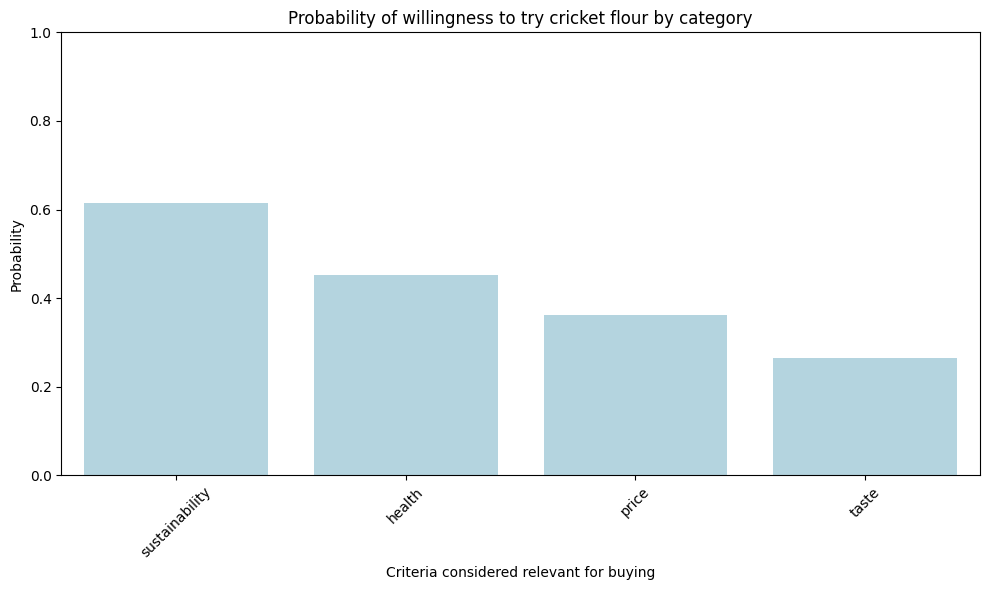

In [386]:
sorted_data = df_probability.iloc[0].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x= sorted_data.index, y=sorted_data.values, color="lightblue")
plt.title('Probability of willingness to try cricket flour by category')
plt.ylabel('Probability')
plt.xlabel('Criteria considered relevant for buying')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='dietary_habits'>

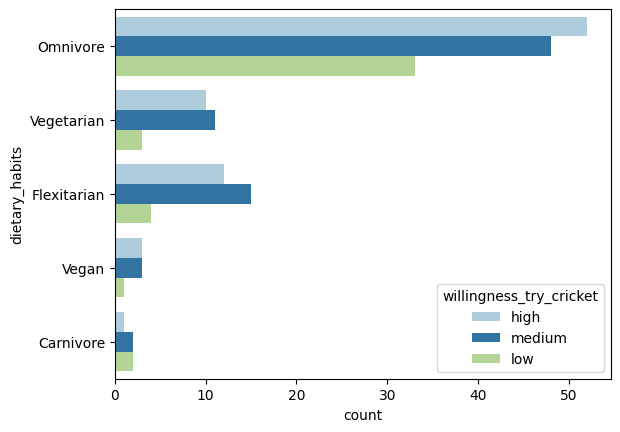

In [387]:
sns.countplot(data=df, y="dietary_habits", hue="willingness_try_cricket", palette="Paired")

In [388]:
# probability calculations
flex_high_likeli = grouping("dietary_habits","==","Flexitarian")
omniv_high_likeli = grouping("dietary_habits","==","Omnivore")
fitness_high_likeli = grouping("dietary_habits","==","Fitness") 
vegetarian_high_likeli = grouping("dietary_habits","==","Vegetarian")
vegan_high_likeli = grouping("dietary_habits","==","Vegan")

In [389]:
df["dietary_habits"].value_counts()

dietary_habits
Omnivore       133
Flexitarian     31
Vegetarian      24
Vegan            7
Carnivore        5
Name: count, dtype: int64

In [390]:
diet_groups = {
    "Flexitarian": flex_high_likeli,
    "Omnivore": omniv_high_likeli,
    "Fitness": fitness_high_likeli,
    "Vegetarian": vegetarian_high_likeli,
    "Vegan": vegan_high_likeli,
}
probability_by_diet = probabilities(diet_groups, column="dietary_habits")

In [391]:
probability_by_diet

{'Flexitarian': 0.3870967741935484,
 'Omnivore': 0.39097744360902253,
 'Fitness': None,
 'Vegetarian': 0.4166666666666667,
 'Vegan': 0.42857142857142855}

In [392]:
df_diet= pd.DataFrame([probability_by_diet])

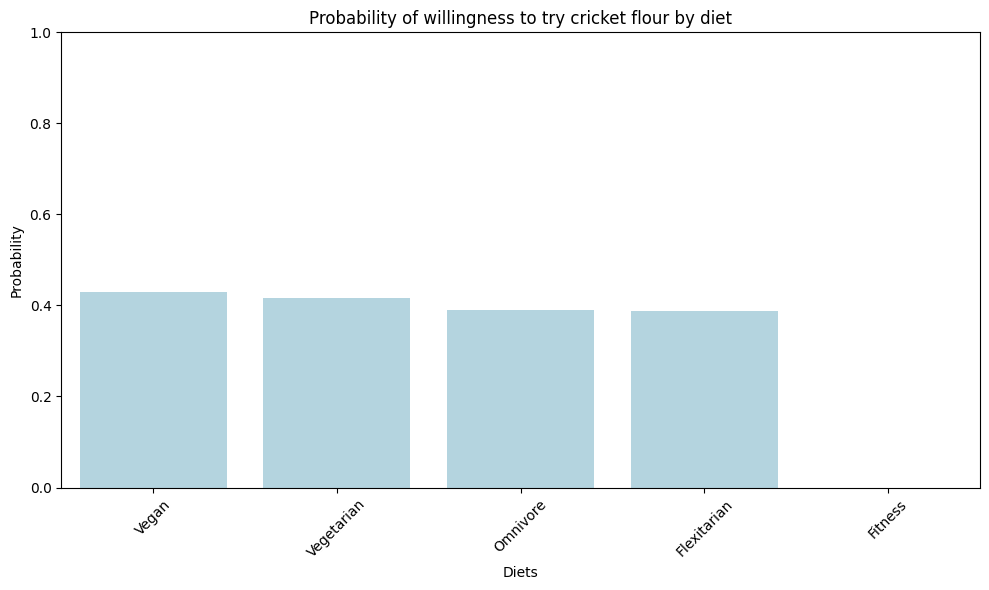

In [393]:
sorted_data_diet = df_diet.iloc[0].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x= sorted_data_diet.index, y=sorted_data_diet.values, color="lightblue")
plt.title('Probability of willingness to try cricket flour by diet')
plt.ylabel('Probability')
plt.xlabel('Diets')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [394]:
age_order = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

In [395]:
df["age"].value_counts()

age
25-34       57
35-44       56
18-24       45
44-above    42
Name: count, dtype: int64

In [396]:
# probability calculations
young_high_likeli =  grouping("age","==","18-24") 
young_adult_high_likeli = grouping("age","==","25-34") 
adult_high_likeli = grouping("age","==","35-44") 
middle_high_likeli = grouping("age","==","44-above") 


In [397]:
age_groups = {
"18-24":young_high_likeli,
"25-34":young_adult_high_likeli,
"35-44":adult_high_likeli, 
"45-54":middle_high_likeli,  
}


probabilities_by_age = probabilities(age_groups, column="age")

In [398]:
probabilities_by_age
df_age =  pd.DataFrame([probabilities_by_age])

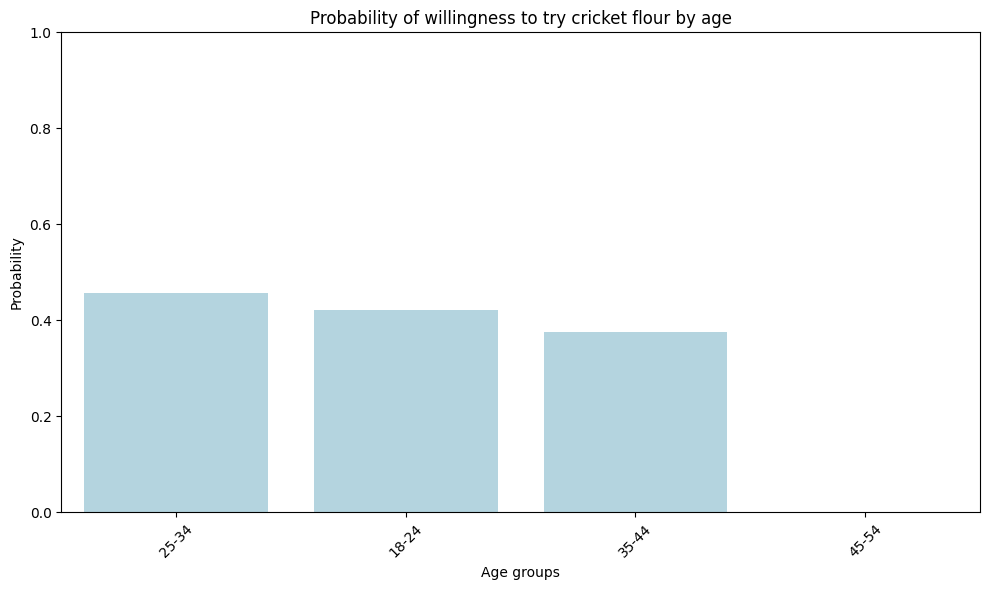

In [399]:
sorted_data_age = df_age.iloc[0].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x= sorted_data_age.index, y=sorted_data_age.values, color="lightblue")
plt.title('Probability of willingness to try cricket flour by age')
plt.ylabel('Probability')
plt.xlabel('Age groups')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [401]:
df.columns

Index(['age', 'health', 'price', 'sustainability', 'taste', 'dietary_habits',
       'openness', 'tried', 'willingness', 'willingness_try_cricket'],
      dtype='object')

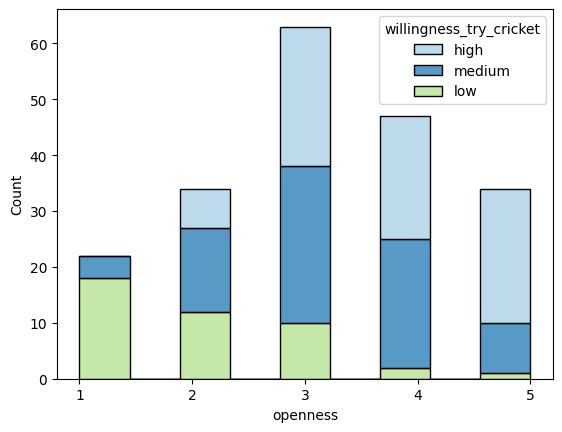

In [403]:
sns.histplot(data=df, x="openness", hue="willingness_try_cricket", multiple="stack", palette= "Paired")
plt.xticks([1,2,3,4,5])
plt.show()